In [1]:
import numpy as np

In [2]:
X_train = np.load('/home/iotadmin/notebooks/array/window_50_t_train_split_small.npy')
Y_train = np.load('/home/iotadmin/notebooks/array/window_50_t_train_split_small1.npy')
X_test = np.load('/home/iotadmin/notebooks/array/test_window_50_t_test_split_small.npy')
Y_test = np.load('/home/iotadmin/notebooks/array/test_window_50_t_test_split_small1.npy')

In [ ]:
Y_train.shape

In [ ]:
X_train.shape

In [6]:
import tensorflow.keras as keras
import tensorflow as tf

n_feature_maps = 128
input_shape = (50,42)
nb_classes = 1


input_layer = keras.layers.Input(input_shape)

# BLOCK 1

conv_x = keras.layers.Conv1D(filters=n_feature_maps, kernel_size=8, padding='same')(input_layer)
#conv_x = keras.layers.BatchNormalization()(conv_x)
conv_x = keras.layers.Activation('relu')(conv_x)

conv_y = keras.layers.Conv1D(filters=n_feature_maps, kernel_size=5, padding='same')(conv_x)
#conv_y = keras.layers.BatchNormalization()(conv_y)
conv_y = keras.layers.Activation('relu')(conv_y)

conv_z = keras.layers.Conv1D(filters=n_feature_maps, kernel_size=3, padding='same')(conv_y)
#conv_z = keras.layers.BatchNormalization()(conv_z)

# expand channels for the sum
shortcut_y = keras.layers.Conv1D(filters=n_feature_maps, kernel_size=1, padding='same')(input_layer)
#shortcut_y = keras.layers.BatchNormalization()(shortcut_y)

output_block_1 = keras.layers.add([shortcut_y, conv_z])
output_block_1 = keras.layers.Activation('relu')(output_block_1)

# BLOCK 2

conv_x = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=8, padding='same')(output_block_1)
#conv_x = keras.layers.BatchNormalization()(conv_x)
conv_x = keras.layers.Activation('relu')(conv_x)

conv_y = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=5, padding='same')(conv_x)
#conv_y = keras.layers.BatchNormalization()(conv_y)
conv_y = keras.layers.Activation('relu')(conv_y)

conv_z = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=3, padding='same')(conv_y)
#conv_z = keras.layers.BatchNormalization()(conv_z)

# expand channels for the sum
shortcut_y = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=1, padding='same')(output_block_1)
#shortcut_y = keras.layers.BatchNormalization()(shortcut_y)

output_block_2 = keras.layers.add([shortcut_y, conv_z])
output_block_2 = keras.layers.Activation('relu')(output_block_2)

# BLOCK 3

conv_x = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=8, padding='same')(output_block_2)
#conv_x = keras.layers.BatchNormalization()(conv_x)
conv_x = keras.layers.Activation('relu')(conv_x)

conv_y = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=5, padding='same')(conv_x)
#conv_y = keras.layers.BatchNormalization()(conv_y)
conv_y = keras.layers.Activation('relu')(conv_y)

conv_z = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=3, padding='same')(conv_y)
#conv_z = keras.layers.BatchNormalization()(conv_z)

# no need to expand channels because they are equal
#shortcut_y = keras.layers.BatchNormalization()(output_block_2)

output_block_3 = keras.layers.add([output_block_2, conv_z])  #shortcut_y
output_block_3 = keras.layers.Activation('relu')(output_block_3)

# FINAL

gap_layer = keras.layers.GlobalAveragePooling1D()(output_block_3)

output_layer = keras.layers.Dense(nb_classes)(gap_layer)

model = keras.models.Model(inputs=input_layer, outputs=output_layer)

model.compile(loss='mse', optimizer='adam',
              metrics=['mae'])

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)

file_path = '/home/iotadmin/notebooks/sangeon' + 'best_model64_2.hdf5'

model_checkpoint = keras.callbacks.ModelCheckpoint(filepath=file_path, monitor='loss',
                                                   save_best_only=True)

callbacks = [reduce_lr, model_checkpoint]

In [7]:
from keras import backend as K 
K.clear_session()

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50, 42)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 50, 128)      43136       input_1[0][0]                    
__________________________________________________________________________________________________
activation (Activation)         (None, 50, 128)      0           conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 50, 128)      82048       activation[0][0]                 
______________________________________________________________________________________________

In [10]:
mini_batch_size = int(min(X_train.shape[0] / 10, 128))
history = model.fit(X_train, Y_train, epochs= 100, batch_size=128,callbacks=callbacks)


Train on 156188 samples
Epoch 1/100
156188/156188 [==============================] - 35s 227us/sample - loss: 12472.1392 - mae: 74.9273
Epoch 2/100
156188/156188 [==============================] - 36s 227us/sample - loss: 12461.9541 - mae: 74.6027
Epoch 3/100
156188/156188 [==============================] - 36s 228us/sample - loss: 12421.5678 - mae: 75.0429
Epoch 4/100
156188/156188 [==============================] - 35s 225us/sample - loss: 12542.3549 - mae: 74.9656
Epoch 5/100
156188/156188 [==============================] - 36s 228us/sample - loss: 12120.8967 - mae: 73.4832
Epoch 6/100
156188/156188 [==============================] - 35s 227us/sample - loss: 12081.8661 - mae: 73.8536
Epoch 7/100
156188/156188 [==============================] - 36s 228us/sample - loss: 11956.0363 - mae: 73.3959
Epoch 8/100
156188/156188 [==============================] - 35s 226us/sample - loss: 12012.6400 - mae: 73.4645
Epoch 9/100
156188/156188 [==============================] - 35s 227us/sample - 

In [8]:
X_test[:2000].shape

(2000, 50, 42)

In [11]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#유닛 64개
Y_predict = model.predict(X_test)
print(mean_squared_error(Y_test, Y_predict))
print(mean_squared_error(Y_test, Y_predict)**0.5)
print(r2_score(Y_test, Y_predict))

72498.02195226951
269.25456718924846
0.796142841435872


In [43]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#유닛 128개 에포크 500
Y_predict = model.predict(X_test)
print(mean_squared_error(Y_test, Y_predict))
print(mean_squared_error(Y_test, Y_predict)**0.5)
print(r2_score(Y_test, Y_predict))

52952.83474854189
230.1148294841988
0.8511019454177584


In [45]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#유닛 128개 에포크 600
Y_predict = model.predict(X_test)
print(mean_squared_error(Y_test, Y_predict))
print(mean_squared_error(Y_test, Y_predict)**0.5)
print(r2_score(Y_test, Y_predict))

57418.18417393128
239.62091764687673
0.8385458311770809


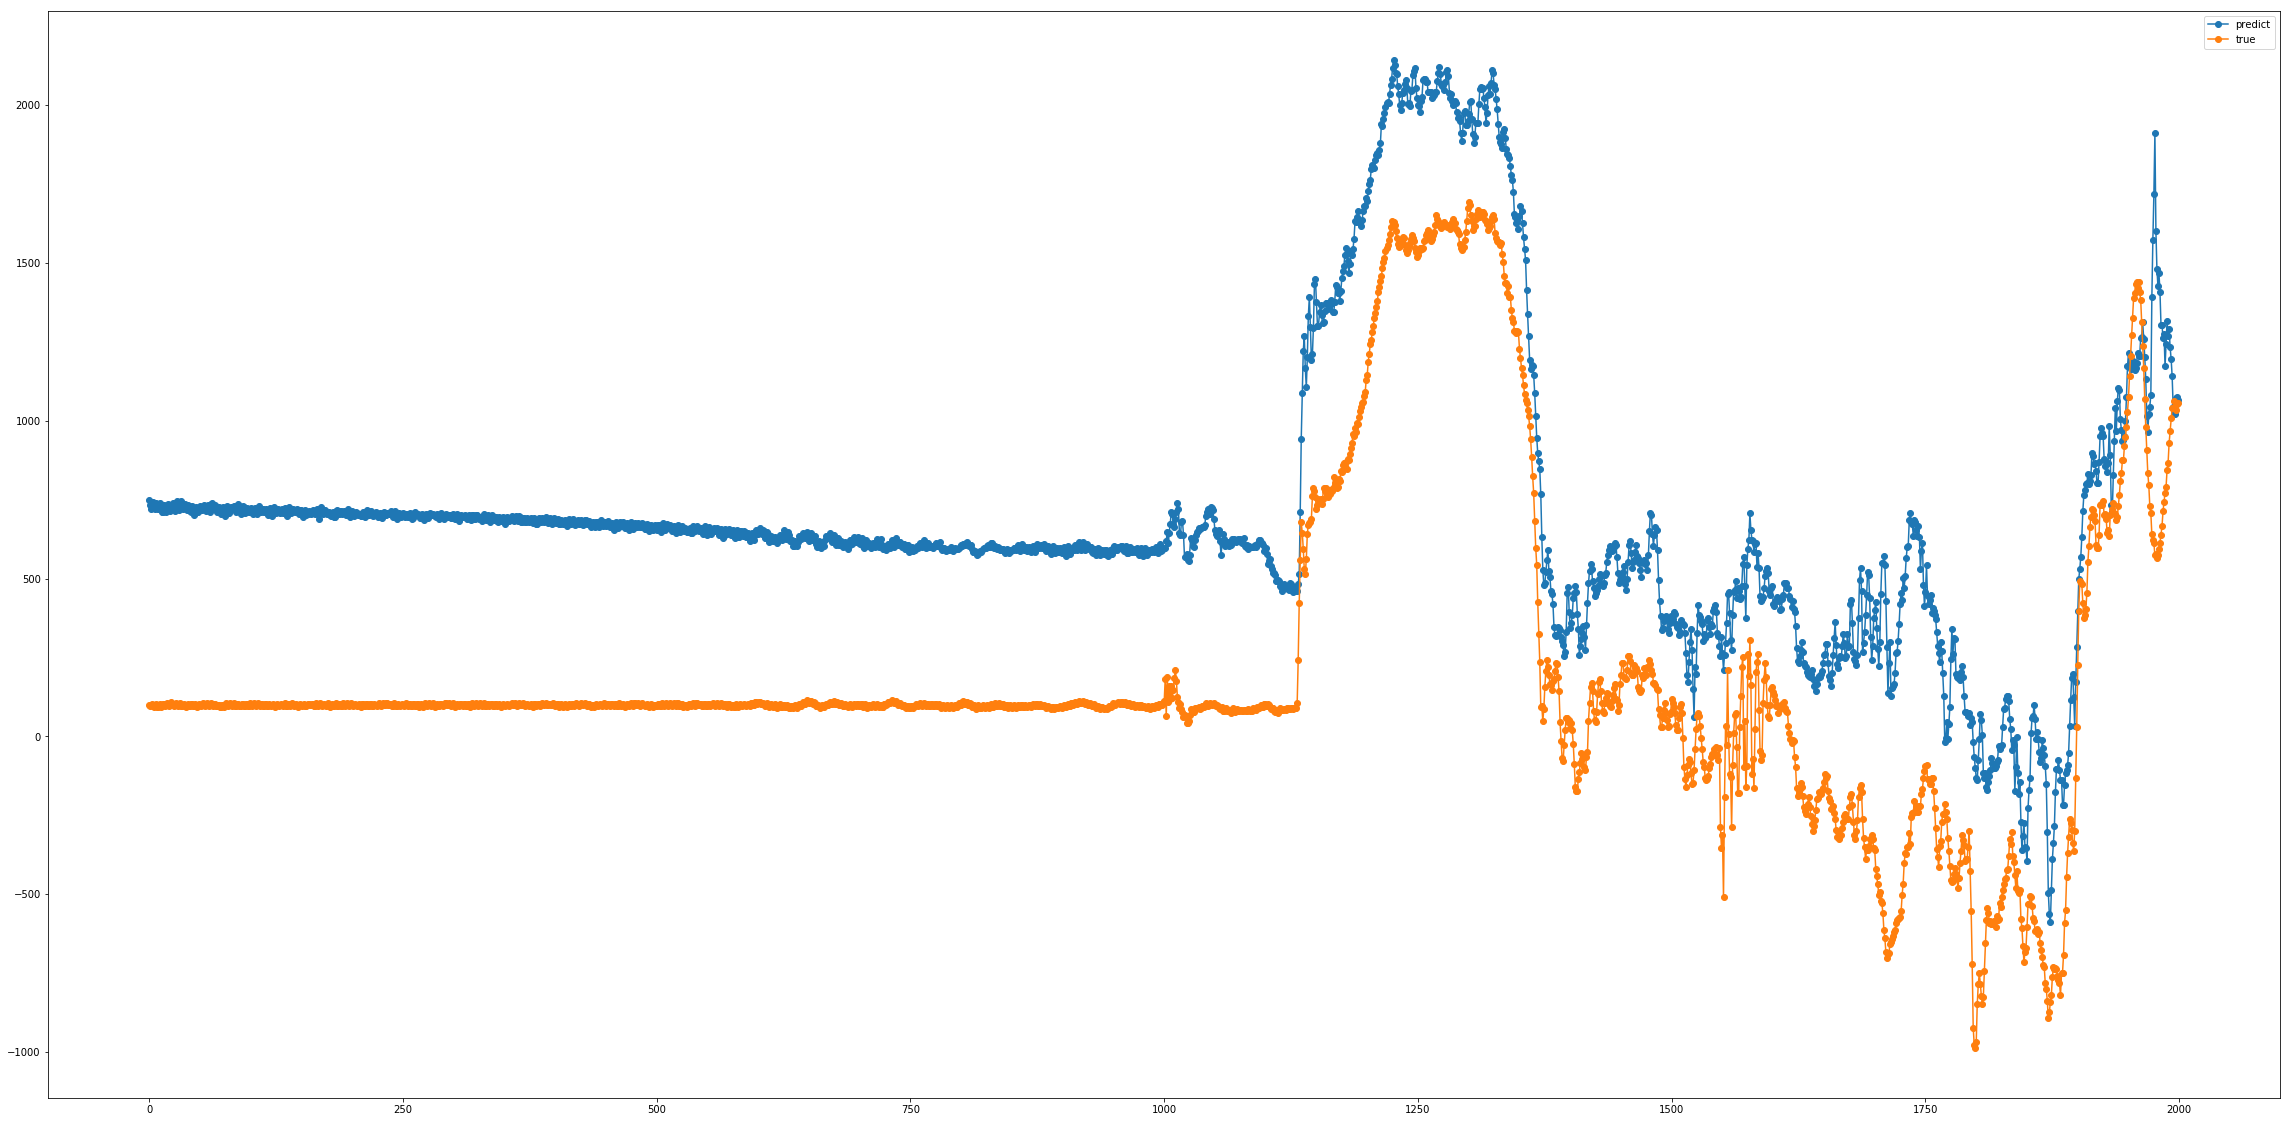

In [34]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(40, 20))

#plt.plot(b.iloc[:500])
plt.plot(Y_predict[0:2000],marker='o',linestyle='solid',label='predict')
plt.plot(Y_test[0:2000],marker='o',linestyle='solid',label='true')
#plt.plot(select.iloc[:500])
plt.legend(loc='upper right')
plt.show()